# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Ensemble classification and hyperparameter tuning
## Preparations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [2]:
# Read the previously used liver spectroscopy data set
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)

['collagen' 'glycogen' 'lipids' 'DNA']


,1801,1797,1793,1789,1785,1781,1778,1774,1770,1766,...,937,933,929,925,921,917,914,910,906,902
494,0.090,0.091,0.091,0.091,0.091,0.092,0.093,0.094,0.098,0.105,...,0.240,0.241,0.242,0.243,0.245,0.245,0.245,0.244,0.241,0.240
361,0.122,0.122,0.122,0.122,0.121,0.121,0.121,0.122,0.123,0.123,...,0.238,0.241,0.242,0.241,0.238,0.234,0.230,0.226,0.224,0.222
475,0.135,0.136,0.137,0.138,0.138,0.139,0.140,0.141,0.145,0.152,...,0.178,0.177,0.176,0.177,0.178,0.177,0.175,0.174,0.172,0.170
320,0.095,0.097,0.097,0.097,0.096,0.097,0.097,0.100,0.102,0.103,...,0.220,0.222,0.222,0.222,0.221,0.217,0.212,0.207,0.203,0.199
556,0.126,0.126,0.126,0.125,0.124,0.123,0.123,0.123,0.125,0.132,...,0.211,0.214,0.217,0.217,0.218,0.220,0.220,0.220,0.219,0.219
650,0.164,0.165,0.166,0.167,0.167,0.169,0.170,0.172,0.174,0.177,...,0.162,0.162,0.162,0.162,0.161,0.160,0.159,0.157,0.154,0.153
693,0.144,0.145,0.146,0.147,0.148,0.150,0.152,0.155,0.158,0.162,...,0.207,0.207,0.206,0.205,0.204,0.202,0.200,0.198,0.195,0.193
19,0.115,0.116,0.116,0.116,0.116,0.116,0.116,0.117,0.118,0.119,...,0.215,0.215,0.214,0.213,0.212,0.208,0.205,0.202,0.199,0.198
517,0.100,0.100,0.100,0.099,0.099,0.099,0.099,0.101,0.106,0.113,...,0.237,0.240,0.242,0.245,0.246,0.248,0.248,0.248,0.247,0.248
682,0.122,0.123,0.124,0.126,0.126,0.128,0.129,0.132,0.135,0.139,...,0.227,0.228,0.229,0.228,0.227,0.227,0.226,0.223,0.221,0.219


<Axes: >

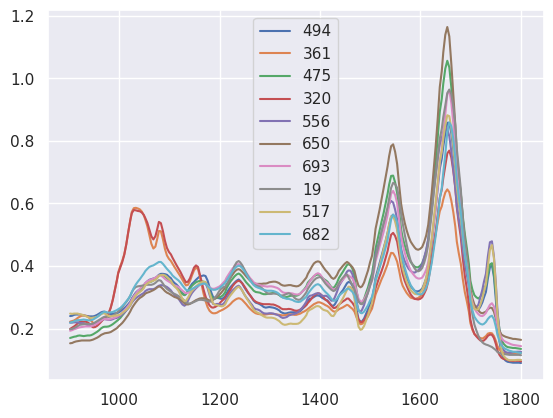

In [3]:
# Parse the column index to integer wavelengths using a lambda-function
wl=D.columns[:-1].map(lambda x: int(float(x)))

# Separate the numerical data from liver spectroscopy to design matrix X
X=D.iloc[:,:-1]

# Assign numerical values to column names, so that the plot is prettier
X.columns=wl

# Print and plot 10 randomly selected samples from the data
sample=X.sample(10)
display(sample)
sample.T.plot()

## Task 1: Apply the extratrees classifier

Import Extratrees classifier from `sklearn.ensemble`, instantiate a classifier with following parameters. 
 - number of estimators = 10
 - maximum depth = 3
 - minimum samples split = 2

When the predictor is trained with these ad-hoc parameters, study its performance with following 5 methods

 1. Styled confusion matrix: `display(pd.crosstab(....))`
 3. Accuracy: `print(metrics.accuracy_score(...))`
 4. More accuracy measures: `print(metrics.classification_report(...))`
 5. Check accuracy with cross validation: `print(cross_val_score(...))` using three-fold cross validation
 6. Calculate the mean of cross validation results over all folds

You can check what recall and f1-score means from SKlearn documentation, page [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

You can import [Extratrees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) Import also [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) from sklearn since it contains all important classifier metrices. And import cross_val_score from [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| classifier, estimator | `est` |
| Accuracy | `accuracy` |
| Cross val accuracy | `cv_accuracy` |
| Confusion matrix, made with crosstab | `cm` |

Styled Confusion Matrix:


Predicted,0,1,2,3,All
Actual,,,,,
0,20,7,0,0,27
1,0,52,0,0,52
2,0,0,65,1,66
3,2,0,0,73,75
All,22,59,65,74,220


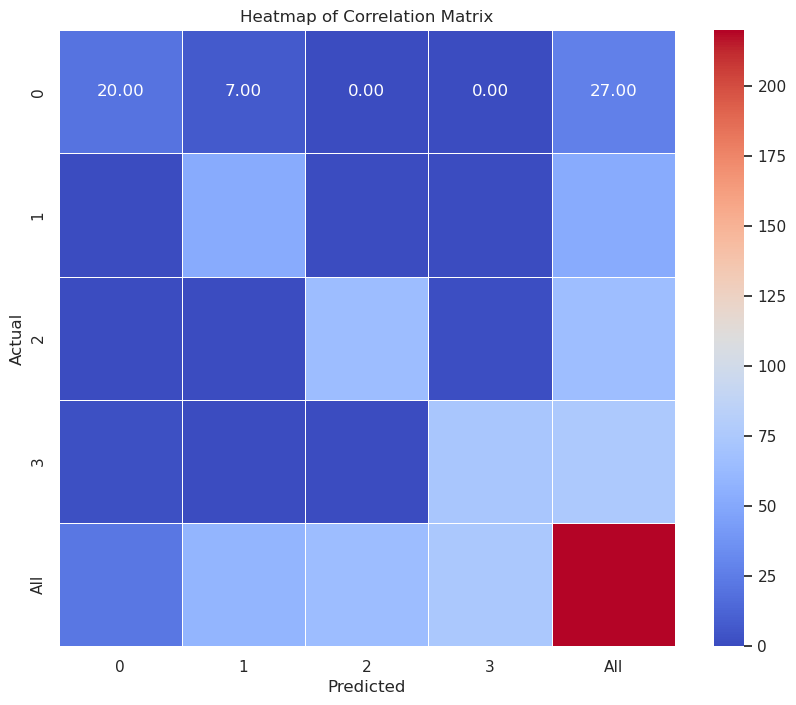


Accuracy of training data:
0.9545454545454546

More Accuracy Measures:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.88      1.00      0.94        52
           2       1.00      0.98      0.99        66
           3       0.99      0.97      0.98        75

    accuracy                           0.95       220
   macro avg       0.94      0.92      0.93       220
weighted avg       0.96      0.95      0.95       220


Cross-Validation Scores:
[0.90983607 0.89754098 0.93004115]

Mean Cross-Validation Accuracy:
0.9124727338145675


In [10]:
# YOUR CODE HERE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder to convert categorical class labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(types)

est = ExtraTreesClassifier(n_estimators=10, max_depth=3, min_samples_split=2)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Perform 3-fold cross-validation and calculate the accuracy
cv_accuracy = cross_val_score(est, X, y, cv=3)

# Calculate the mean of cross-validation results over all folds
cv_accuracy_mean = cv_accuracy.mean()

# Output the results for the specified evaluation methods
cm_style = cm.style.background_gradient(cmap='coolwarm')  # Styled confusion matrix for display
classification_report = metrics.classification_report(y_test, y_pred)  # More accuracy measures


print("Styled Confusion Matrix:")
display(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Print the accuracy
print("\nAccuracy of training data:")
print(accuracy)

# Print more accuracy measures (classification report)
print("\nMore Accuracy Measures:")
print(classification_report)

# Print cross-validation scores
print("\nCross-Validation Scores:")
print(cv_accuracy)

# Print the mean of cross-validation results over all folds
print("\nMean Cross-Validation Accuracy:")
print(cv_accuracy_mean)



In [ ]:
import sklearn
errorfound=False
require=('est', 'accuracy', 'cv_accuracy', 'cm')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

if type(est) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
if not errorfound:
    print("No errrors found this far, your code may work :)")


## Task 2, optimize the classifier

Lets try now to find optimal parameters controlling the model (=hyperparameters) for the classifier with grid search CV. Search the parameters:
 - `n_estimators`
 - `max_depth` and
 - `min_samples_split`

Use the previously used extratrees classifier as a starting point

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Tunable parameters structure | `params` |
| Grid search object | `cv_est` |

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
params = {
    'n_estimators': [5, 10, 50, 100],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8]
}

# Instantiate the GridSearchCV object with the ExtraTreesClassifier
cv_est = GridSearchCV(est, params, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
cv_est.fit(X_train, y_train)

# The best parameters found by GridSearchCV
best_parameters = cv_est.best_params_

# The best score achieved with these parameters
best_score = cv_est.best_score_

# Output the best parameters and the best score
best_parameters, best_score


({'max_depth': 9, 'min_samples_split': 8, 'n_estimators': 5},
 0.9882582272675152)

In [ ]:
errorfound=False
require=('params', 'cv_est')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        

## Task 3

Having trained your estimator, check what where the optimal parameters, and compare the CV-accuracy with the previous model and plot the confusion matrix with crosstab as well. Did it improve?

Notice that you will find the optimised estimator as `cv_est.best_estimator_`, and you can see all its parameters with `est_opt.get_params()`.

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Optimal, tuned predictor | `est_opt` |
| Cross validation accuracy | `cv_opt` |
| Confusion matrix  | `cm_opt` |

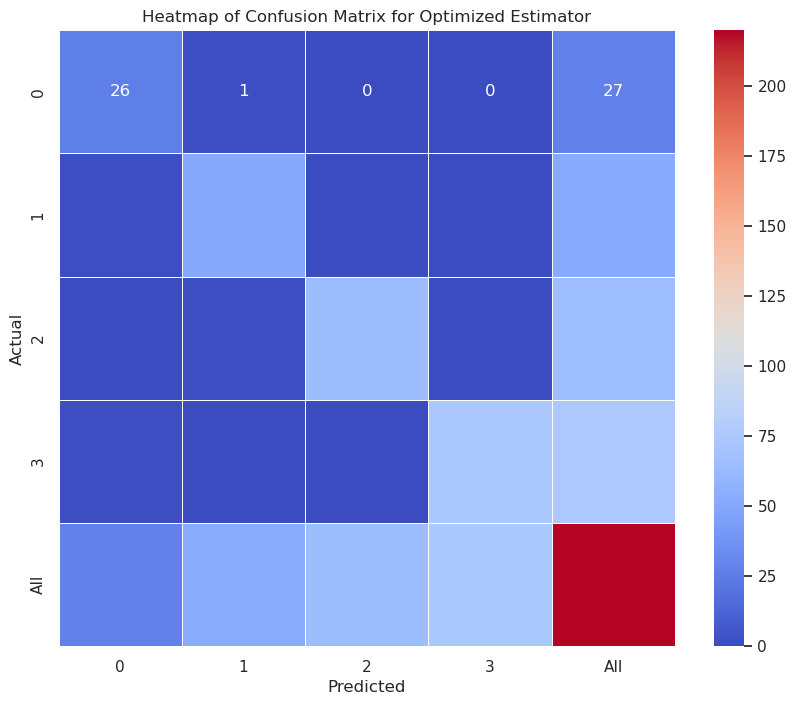

(ExtraTreesClassifier(max_depth=9, min_samples_split=8, n_estimators=5),
 0.9630922665227462,
 Predicted   0   1   2   3  All
 Actual                        
 0          26   1   0   0   27
 1           1  51   0   0   52
 2           0   1  65   0   66
 3           1   0   0  74   75
 All        28  53  65  74  220)

In [15]:
est_opt = cv_est.best_estimator_

# Evaluate the optimized estimator with cross-validation
cv_opt_scores = cross_val_score(est_opt, X, y, cv=3)
cv_opt = cv_opt_scores.mean()

# Predict the classes using the optimized estimator on the test set
y_opt_pred = est_opt.predict(X_test)

# Generate the confusion matrix for the optimized estimator
cm_opt = pd.crosstab(y_test, y_opt_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Plot the heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap of Confusion Matrix for Optimized Estimator')
plt.show()

# Return the variables as per the task requirements
est_opt, cv_opt, cm_opt

In [ ]:
errorfound=False
require=('est_opt', 'cv_opt', 'cm_opt')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        